# Capstone 20.1 Assignment - Initial Report & EDA

### Capstone Project - Classification Machine Learning Modeling for Hypertension Indicators - by Paul Jibrail

In [1]:
# Necessary Python libaries and Modules

In [2]:
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.inspection import DecisionBoundaryDisplay


## Business Understanding

### Objectives

This capstone project's objective is to utilize machine learning models to classify patients for hypertension with high accuracy based on 13 data points, most of which are results from medical tests or service results. These models can be utilized as a validation method or cross-checking by medical personnel when working with current patients. Especially, in cases where the initial medical services focus is not necessarily hypertension and a machine learning model can assist in proactive care and validating current care circumstances. To accomplish this several machine learning models will be trained and tested with a high performance objective for predicting hypertension in patients. Though regardless of the models' performance they can and will not be the sole means for hypertension determination in patients.

## Data

Data Source

The data set was sourced from Kaggle and is called, "Diabetes, Hypertension and Stroke Prediction", of which I chose to focus and use the hypertension_data data set. It contains 13 hypertension indicator features and one binary class target feature. See the data dictionary cell below for more details on the features.  The indicators are mostly based on medical test results for patients and are key indicators when considering if a patient has hypertension or not. 

See the Git side Readme.md file for more information regarding the data set's source.

Source: https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=hypertension_data.csv

In [3]:
# Load Data Set csv file here to Pandas Frame named 'health1'

In [4]:
health1 = pd.read_csv('data/hypertension_data.csv')

**Data Dictionary** (Feature labels as provided originally from Kaggle data set. I have added my enhanced definitions with 'Note:' markings)

**age:** patient's age (in years)

**sex:** patient's gender (1- male; 0- female)

**cp:** Chest pain type: 0- asymptomatic 1- typical angina 2- atypical angina 3- non-anginal pain  Note: patient chest pain level.

**trestbps:** Resting blood pressure (in mm Hg)  Note: the patient resting blood pressure reading.

**chol:** Serum cholestoral in mg/dl   Note: the patient cholestoral level.

**fbs:** if the patient's fasting blood sugar > 120 mg/dl (1- yes; 0- no) Note: whether patient had a certain level of blood sugar due to fasting.

**restecg:** Resting ECG results: 0- normal 1- ST-T wave abnormality (T wave inversions and/or ST elevation or depression. Note:  This indicator shows the results of an electrocardiogram (ECG) taken while the patient is at rest.

**thalach:** Maximum heart rate achieved. Note: refers to the maximum heart rate achieved during an exercise stress test.

**exang:** Exercise induced angina (1- yes; 0- no) Note: exercise-induced angina. Angina is chest pain or discomfort that occurs when the heart muscle doesn’t get enough oxygen-rich blood.

**oldpeak:** ST depression induced by exercise relative to rest. Note: the term oldpeak refers to ST depression induced by exercise relative to rest. This indicator is used in the context of an exercise stress test.

**slope:** The slope of the peak exercise ST segment: 0- upsloping 1- flat 2- downsloping. Note: the term slope to the slope of the peak exercise ST segment on an electrocardiogram (ECG) during an exercise stress test. 

**ca:** Number of major vessels (0–3) colored by flourosopy. Note: refers to coronary arteries colored by flourosopy imaging to determine blockage and other issues.

**thal:** 3- Normal; 6- Fixed defect; 7- Reversable defect  Note: the term thal refers to thalassemia, which is an inherited blood disorder that affects the body’s ability to produce hemoglobin and healthy red blood cells

**target:** Whether the patient has hypertension (1) or not (0) (binary classifer)

                                                                  

**These are my new labels for some of the original features for better readability:**

chest_pain, rest_bp, fast_bs, rest_ecg, max_hr, exercise_ang, st_depressed, st_slope, art_color, dis_blood, hyper

**These are the corresponding labels in order they replace:**

cp, trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target

Display original dataframe

In [5]:
health1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [6]:
# explore data frame for data types, potential nulls, sample size, and feature count
health1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [7]:
# look for unique value counts per dataframe feature
health1.nunique()

age          88
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
# Creating a new dataframe copy called health2 so to preserve the original health1 if needed later in that form
health2 = health1

In [9]:
# The 'age' feature does not need to be float type, changing the data type from float to int64
health2['age'] = health2['age'].astype('int64')

In [10]:
# Count of NaN values per feature
nan_counts = health1.isna().sum()
print(nan_counts)

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


I found NANs in the 'sex' feature column - no other feature had NANs

In [11]:
# Drop rows with NaN values in the 'sex' column
health2 = health2.dropna(subset=['sex'])

In [12]:
# Reset the index after dropping the NaN samples
health2 = health2.reset_index(drop=True)

In [13]:
# The 'age' feature does not need to be float type, changing the data type from float to int64
health2['sex'] = health2['sex'].astype('int64')

In [14]:
# reviewing dataframes for updates made; age and sex now both int64 type, NAN values gones and index reset
health2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26058 entries, 0 to 26057
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26058 non-null  int64  
 1   sex       26058 non-null  int64  
 2   cp        26058 non-null  int64  
 3   trestbps  26058 non-null  int64  
 4   chol      26058 non-null  int64  
 5   fbs       26058 non-null  int64  
 6   restecg   26058 non-null  int64  
 7   thalach   26058 non-null  int64  
 8   exang     26058 non-null  int64  
 9   oldpeak   26058 non-null  float64
 10  slope     26058 non-null  int64  
 11  ca        26058 non-null  int64  
 12  thal      26058 non-null  int64  
 13  target    26058 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.8 MB


In [15]:
# Count of NaN values per feature to verify all NaNs removed
nan_counts = health2.isna().sum()
print(nan_counts)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Note: At this point in the data preparation there are now 26058 samples instead of the original number of 26083

**Data Feature Relabelling**

As mentioned above in the data dictionary due to the original data set having several uninutitive labels I chose to change some feature labels

Note: I create a new dataframe called health3 for the new label names and subsequent work, as a checkpoint data frame of sorts

In [16]:
# This code reflects the features I chose to relable with more intuitive names
health3 = health2.rename(columns={
    'cp': 'chest_pain',
    'trestbps': 'rest_bp',
    'fbs': 'fast_bs',
    'restecg': 'rest_ecg',
    'thalach': 'max_hr',
    'exang': 'exercise_ang',
    'oldpeak': 'st_depressed',
    'slope': 'st_slope',
    'ca': 'art_color',
    'thal': 'dis_blood',
    'target': 'hyper'
})

In [17]:
# This display of the dataframe 'health3' shows the new labels replacing several of the old ones; currently there are 14 features
health3

,age,sex,chest_pain,rest_bp,chol,fast_bs,rest_ecg,max_hr,exercise_ang,st_depressed,st_slope,art_color,dis_blood,hyper
0,57,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,72,0,0,138,294,1,1,106,0,1.9,1,3,2,0
26054,60,1,0,144,200,0,0,126,1,0.9,1,0,3,0
26055,68,1,0,100,234,0,1,156,0,0.1,2,1,3,0
26056,67,1,1,154,232,0,0,164,0,0.0,2,1,2,0


## Exploratory Data Analysis (EDA)

Now that some of the data cleanup and anomylies have been addressed I will explore it for imblance, weighting, etc.

In [18]:
# This describe function allows me to review the data for several factors including balance and standard deviations.
health3.describe()

,age,sex,chest_pain,rest_bp,chol,fast_bs,rest_ecg,max_hr,exercise_ang,st_depressed,st_slope,art_color,dis_blood,hyper
count,26058.000000,26058.00000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,0.50000,0.956635,131.590682,246.286591,0.149896,0.526057,149.643181,0.326886,1.039742,1.399724,0.720623,2.319057,0.547778
std,15.190407,0.50001,1.022467,17.597086,51.651701,0.356977,0.525688,22.865871,0.469084,1.165673,0.616529,1.011317,0.604868,0.497722
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


I also do a quick review visually of a histogram per feature to look for centralization, value type, and data distribution.

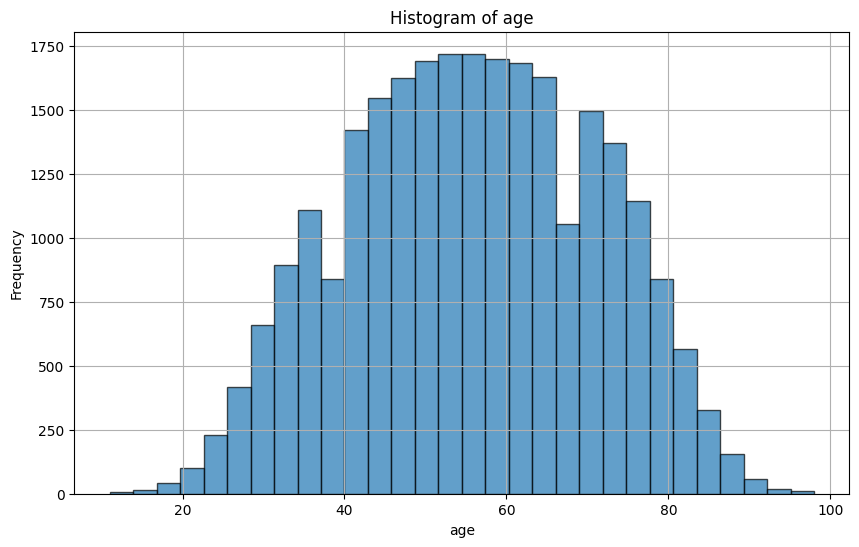

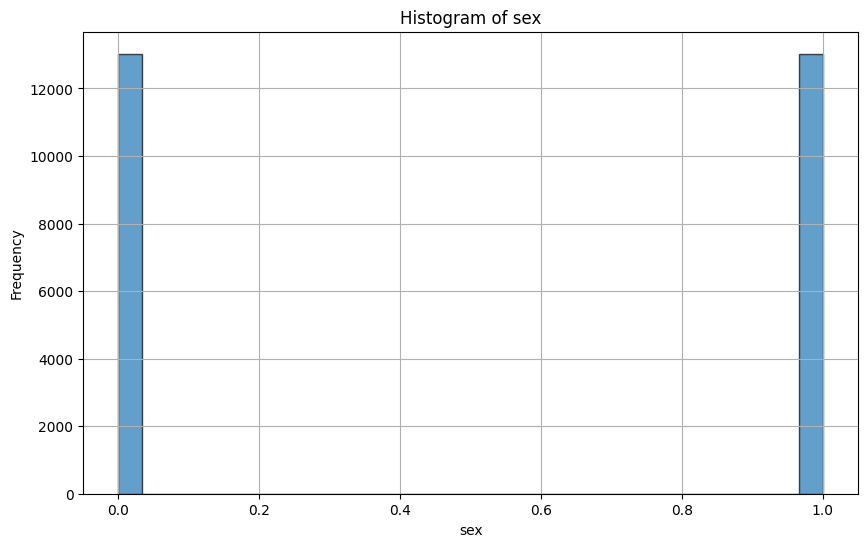

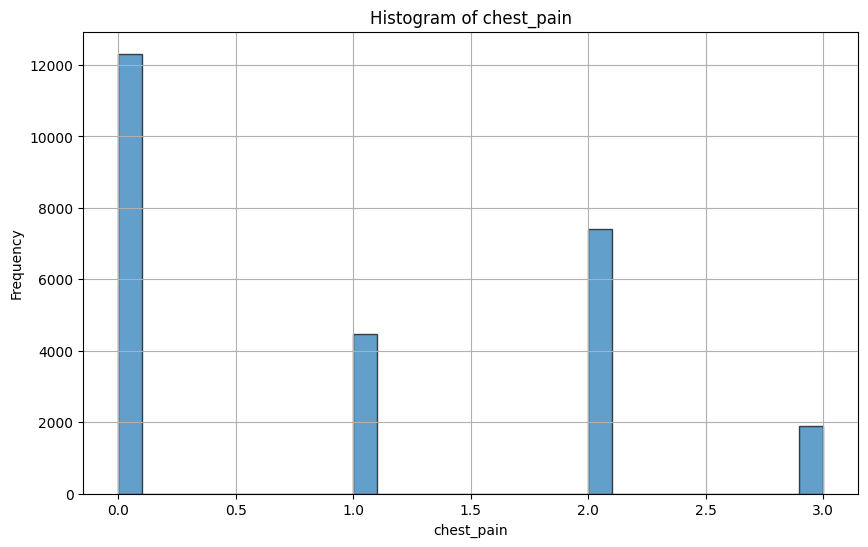

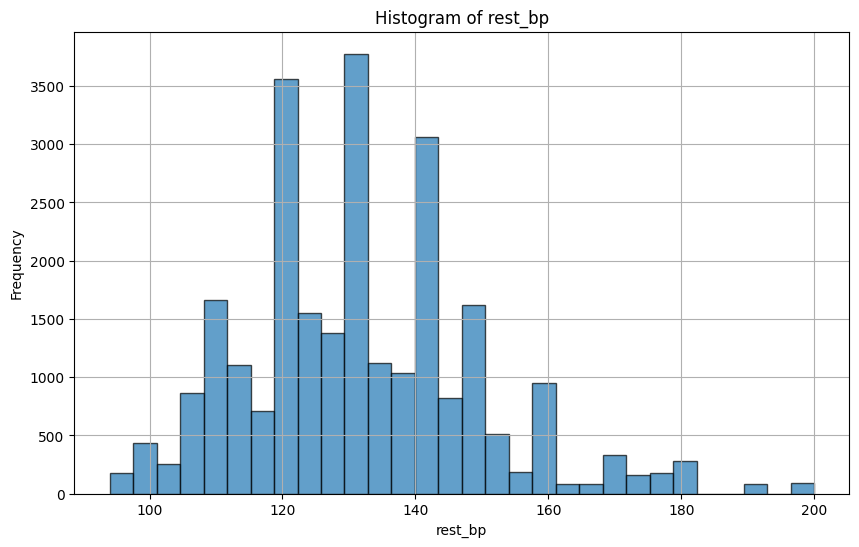

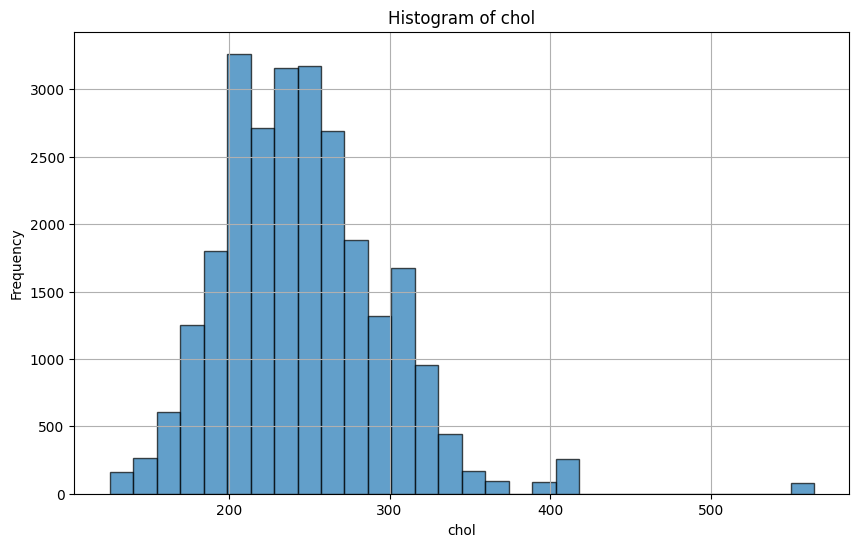

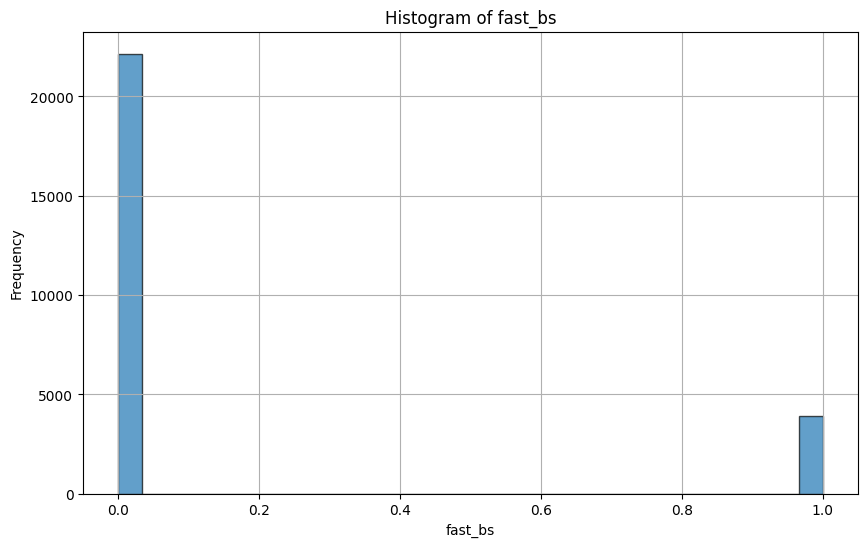

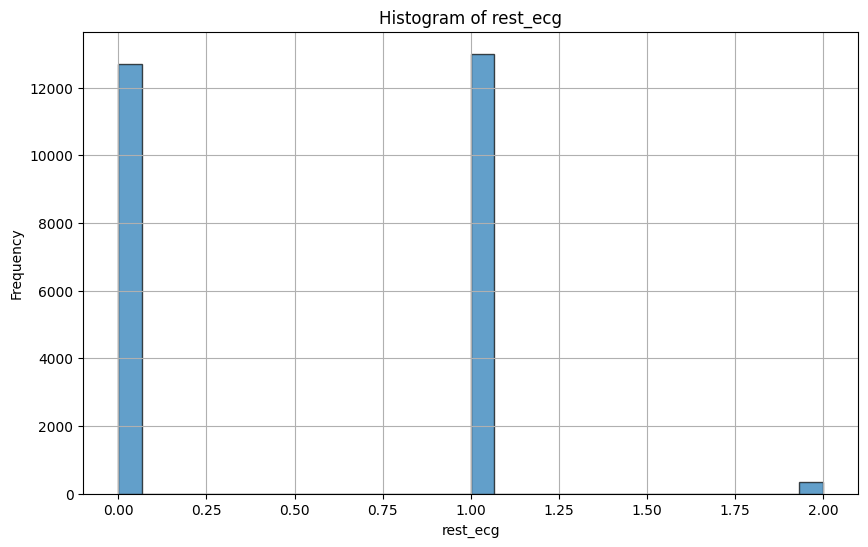

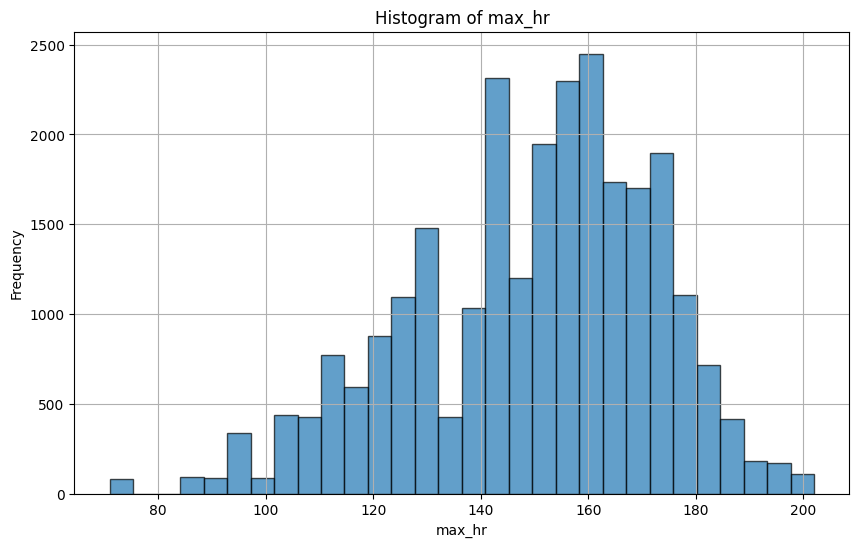

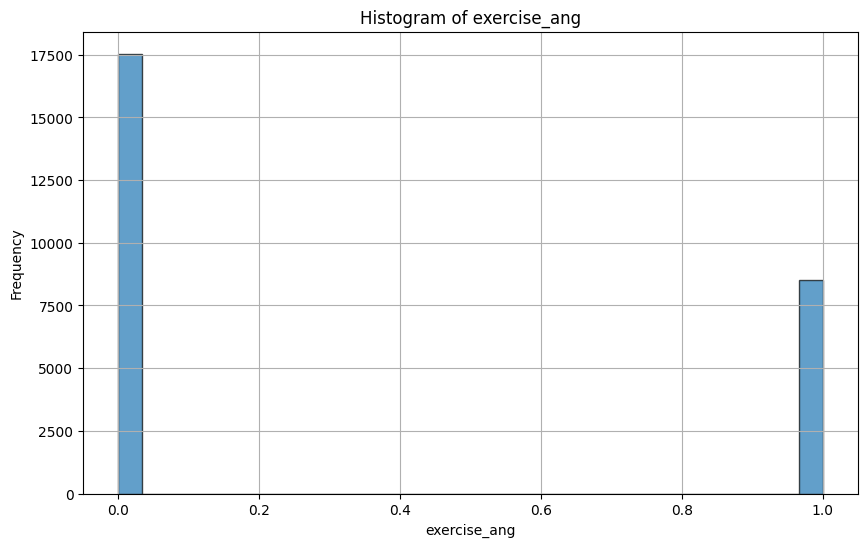

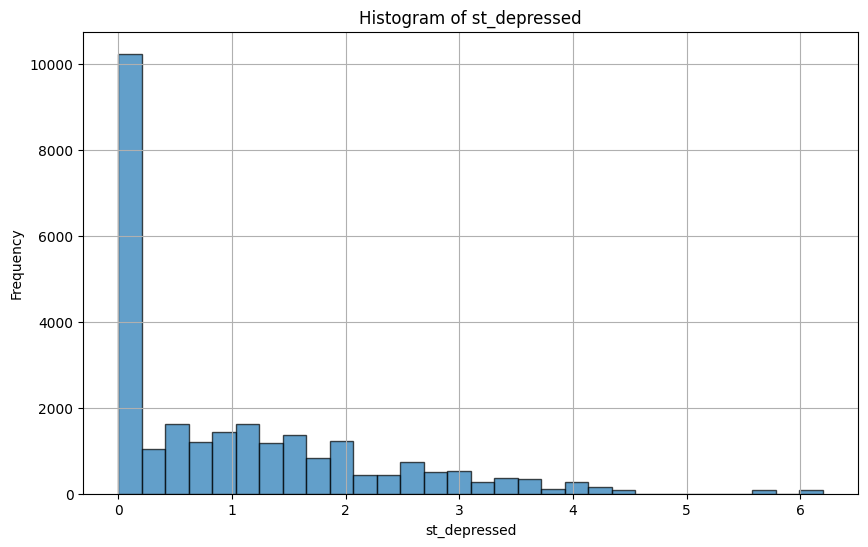

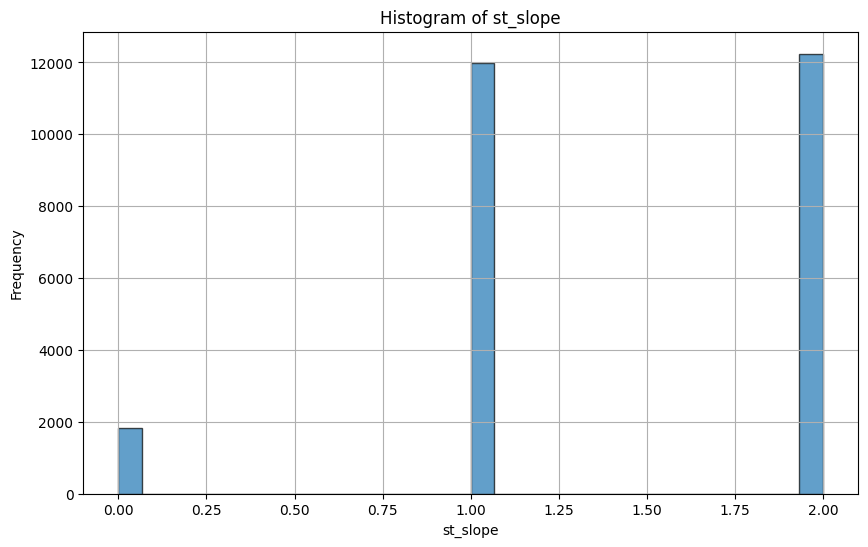

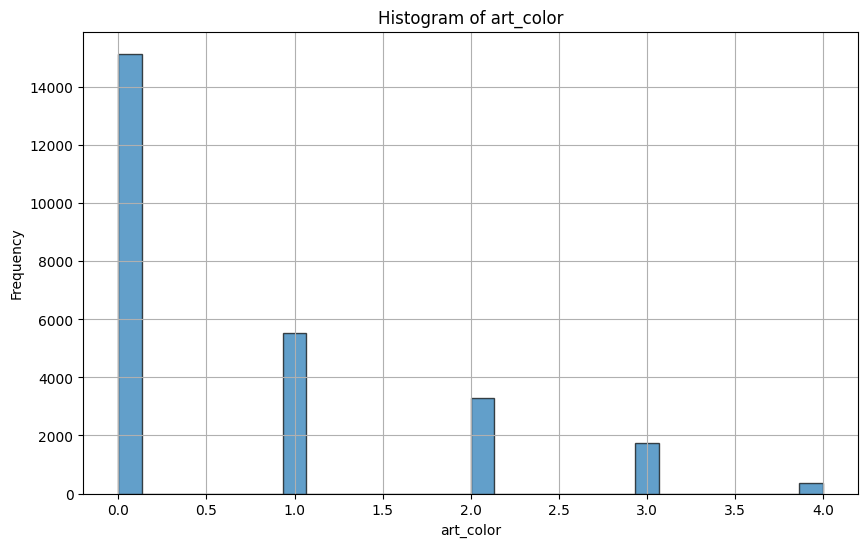

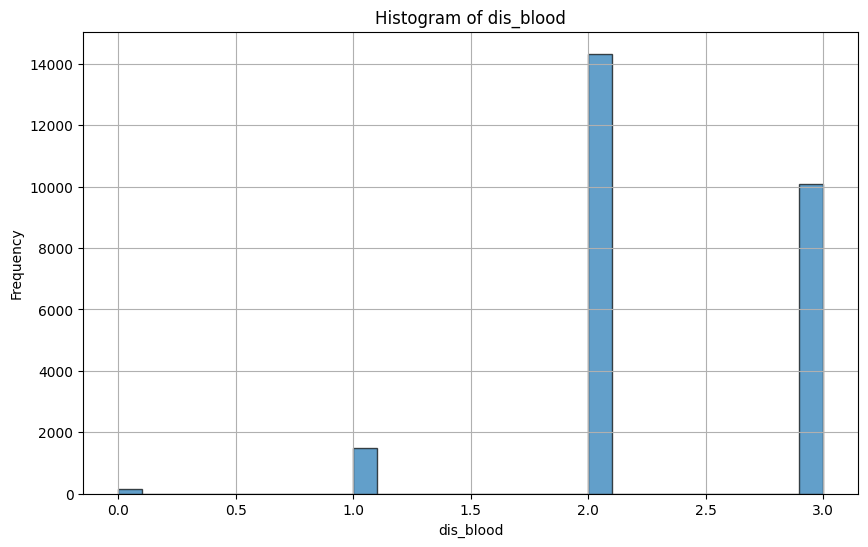

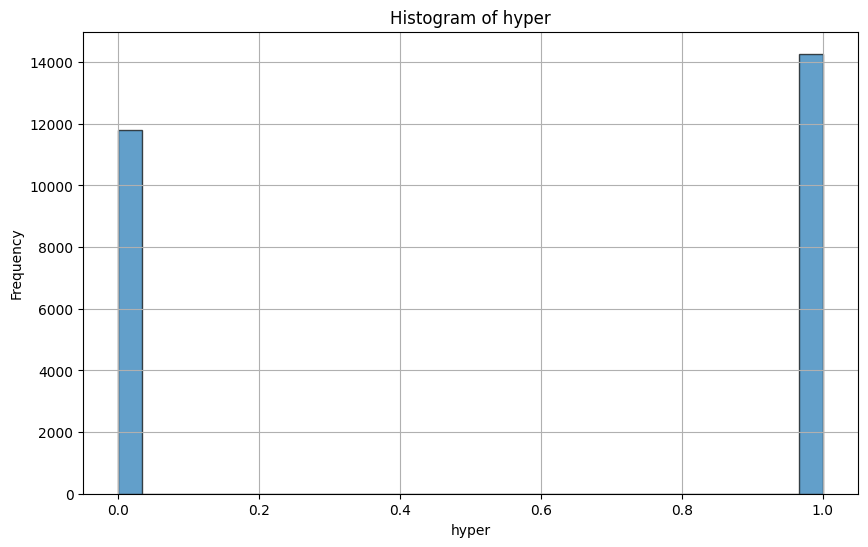

In [19]:
for column in health3.columns[:14]:  # Adjust the range if needed
    plt.figure(figsize=(10, 6))
    plt.hist(health3[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

**Observation:** After reviewing the histograms I noticed several descreet data samplings which appear to be ordinal in nature, and for a couple that are not they only have two value possiblities. I will address these down further in this notebook when preparing the data.

**Observation:** The result is there seems to be a bit of imbalance in the the classifer feature 'hyper' I will address it later down in this notebook.

**Correlation Matrices**

I do further visual analysis for general feature correlation with correlation matrices shown below

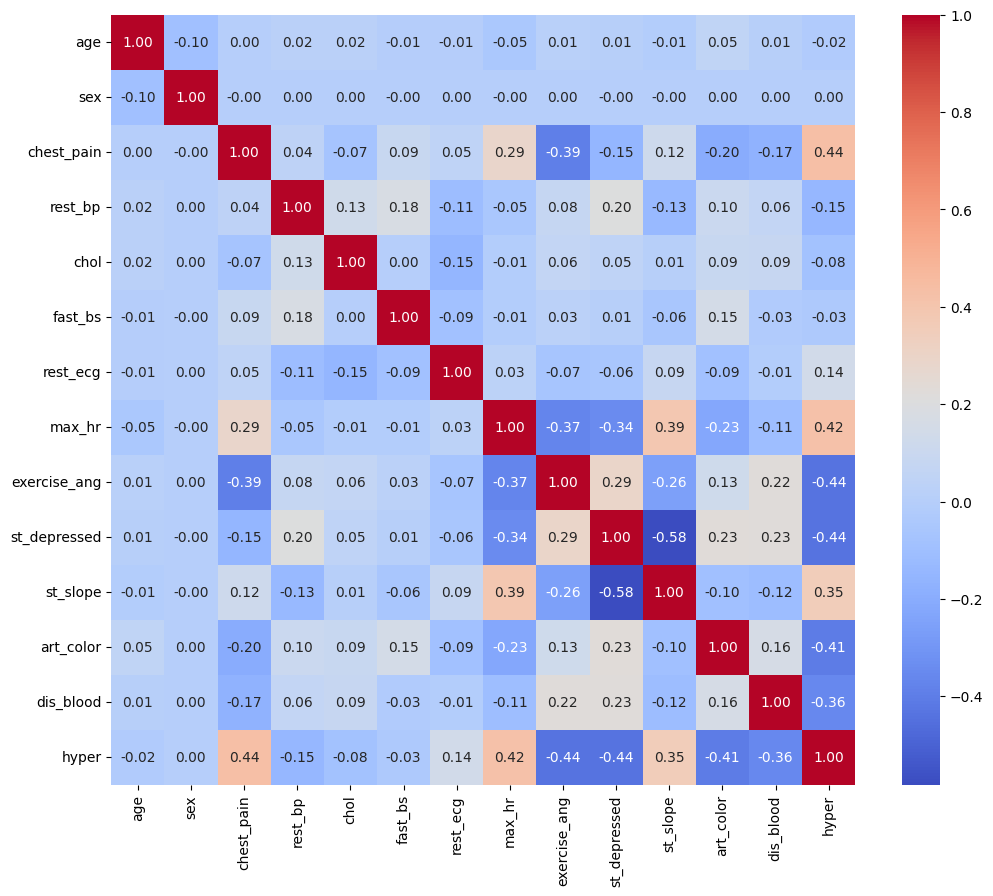

In [21]:
# Correlation analysis
correlation_matrix = health3.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

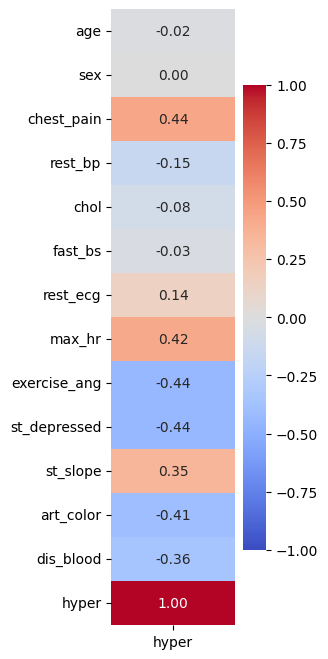

In [22]:
# This correlation matrix focuses on the 'hyper' to all feature relationships for readability
hyper_corr = correlation_matrix[['hyper']]
plt.figure(figsize=(2, 8)) 
sns.heatmap(hyper_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

Now that we have visually and through other functions explored the dataframe 'health3' the next section I will do some data preparation based on that analysis

**Observation:** st_depressed, chest_pain, max_hrt, exercise_ang, and art_color appear to be the most correlated.

## Data Preparation

In this section I will address data imbalance and scaling in preparation for modelling

**Step 1:** Split data set into to X, y sets

**Step 2:** Run ReSampler on both X, y to address imbalance

**Step 3:** Split data sets to X_train, y_train and X_test, y_test

**Step 4:** Review categorical data features and apply StandardScaler and MinMaxScaler as needed

Note: I will not be using OneHotEncoding since the relationships are ordinal except a couple and those are features like 'sex' which have only two values "choices" per feature

Now I give special attention to the binary classification feature of 'hyper' that will be used to train and test hypertension predictability. 

As found in the previous section EDA there is a class imbalance for the 'hyper' feature (histogram) which I will more specifically examine it here.

In [23]:
# check for imbalanced data set
class_counts = health3['hyper'].value_counts()
print(class_counts)

hyper
1    14274
0    11784
Name: count, dtype: int64


Class 1: 14,274

Class 0: 11,784

**Imbalance Ratio= 14,274 / 11,784 ≈1.21**

**Observation:** The imbalance ration is 1.21. This indicates a slight imbalance and three of my four models will be sensitive to it. So to remedy and balance 'hyper', I will apply: **Random Oversampling in Step 2 below.**  This method randomly duplicates examples from the minority class. I did not choose Random Undersampling since I did not want to reduce my overall data set size. Instead add data samples when remedying the imbalance.

**Step1:** Here I will split my data set into an X with 13 features and a y representing the one feature 'hyper'

In [24]:
X = health3.drop('hyper', axis=1)
y = health3['hyper']

In [25]:
# This shows the new X with 13 features and no 'hyper' feature
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26058 entries, 0 to 26057
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           26058 non-null  int64  
 1   sex           26058 non-null  int64  
 2   chest_pain    26058 non-null  int64  
 3   rest_bp       26058 non-null  int64  
 4   chol          26058 non-null  int64  
 5   fast_bs       26058 non-null  int64  
 6   rest_ecg      26058 non-null  int64  
 7   max_hr        26058 non-null  int64  
 8   exercise_ang  26058 non-null  int64  
 9   st_depressed  26058 non-null  float64
 10  st_slope      26058 non-null  int64  
 11  art_color     26058 non-null  int64  
 12  dis_blood     26058 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.6 MB


In [26]:
# This shows the new y panda series with one feature 'hyper'
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 26058 entries, 0 to 26057
Series name: hyper
Non-Null Count  Dtype
--------------  -----
26058 non-null  int64
dtypes: int64(1)
memory usage: 203.7 KB


**Step 2:** The Random Over Sampler function is used to add samples with the objective of balancing the classes

In [27]:
# Random Oversampling is used and X_resammpled is created
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [28]:
X_resampled

,age,sex,chest_pain,rest_bp,chol,fast_bs,rest_ecg,max_hr,exercise_ang,st_depressed,st_slope,art_color,dis_blood
0,57,1,3,145,233,1,0,150,0,2.3,0,0,1
1,64,0,2,130,250,0,1,187,0,3.5,0,0,2
2,52,1,1,130,204,0,0,172,0,1.4,2,0,2
3,56,0,1,120,236,0,1,178,0,0.8,2,0,2
4,66,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28543,58,0,0,150,243,0,0,128,0,2.6,1,0,3
28544,30,0,2,130,256,1,0,142,1,0.6,1,1,1
28545,86,0,0,125,304,0,0,162,1,0.0,2,3,2
28546,65,0,0,100,299,0,0,125,1,0.9,1,2,2


In [29]:
y_resampled

0        1
1        1
2        1
3        1
4        1
        ..
28543    0
28544    0
28545    0
28546    0
28547    0
Name: hyper, Length: 28548, dtype: int64

Note: Now X_resampled and Y_resampled have a sample count of 28548 which shows many samples were created and added, the old sample count was 26058

In [30]:
# Check after over random over sampler run to see balance now
class_counts1 = y_resampled.value_counts()
print(class_counts1)

hyper
1    14274
0    14274
Name: count, dtype: int64


**Observation:** The cell above shows thta the classes are balanced now. Also, notice there are now 28548 total samples; previously 26058 samples.

In [31]:
print(type(y))

<class 'pandas.core.series.Series'>


In [32]:
print(type(y_resampled))

<class 'pandas.core.series.Series'>


**Step 3:** Now the resampled data sets are split into the data sets into training and test to be used with the models, by creating four sets: X_train, X_test, y_train, and y_test


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22838, 13)
X_test shape: (5710, 13)
y_train shape: (22838,)
y_test shape: (5710,)


**Step 4:** Now that the data sets have been created I will apply the MinMax and StandardScaler functions to the appropriate features

In [34]:
# applying StandardScaler and MinMaxScaler

# Define the features to scale
minmax_features = ['sex','chest_pain','fast_bs','rest_ecg','exercise_ang','st_slope','art_color','dis_blood']
standard_features = ['age','rest_bp','chol','max_hr','st_depressed']

# Apply MinMaxScaler to the specified features in the training set
minmax_scaler = MinMaxScaler()
X_train[minmax_features] = minmax_scaler.fit_transform(X_train[minmax_features])
# Apply the same scaling to the testing set
X_test[minmax_features] = minmax_scaler.transform(X_test[minmax_features])

# Apply StandardScaler to the specified features in the training set
standard_scaler = StandardScaler()
X_train[standard_features] = standard_scaler.fit_transform(X_train[standard_features])
# Apply the same scaling to the testing set
X_test[standard_features] = standard_scaler.transform(X_test[standard_features])

In [35]:
X_train

,age,sex,chest_pain,rest_bp,chol,fast_bs,rest_ecg,max_hr,exercise_ang,st_depressed,st_slope,art_color,dis_blood
9517,-0.047693,1.0,0.333333,-0.666388,0.312233,0.0,0.5,1.062952,0.0,-0.916930,1.0,0.00,1.000000
1812,-0.047693,1.0,0.000000,-1.678143,0.350935,0.0,0.0,-1.159391,0.0,-0.411964,0.5,0.00,0.666667
383,-0.377341,0.0,0.333333,-0.216720,1.183020,0.0,0.0,0.932226,0.0,-0.916930,1.0,0.00,0.666667
13520,0.611602,1.0,1.000000,-1.228474,0.331584,0.0,0.5,-0.723638,0.0,0.093002,0.5,0.00,1.000000
729,0.216025,0.0,0.333333,0.120532,0.467040,0.0,0.5,0.583623,0.0,-0.916930,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.150095,0.0,0.333333,-1.228474,-0.345695,0.0,0.5,0.845076,0.0,-0.075320,0.0,0.00,1.000000
5390,0.677532,0.0,0.666667,1.019869,-2.338830,1.0,0.5,1.062952,0.0,-0.748608,1.0,0.25,1.000000
860,0.216025,0.0,0.000000,-0.666388,-0.190888,0.0,0.5,-3.381735,0.0,-0.075320,0.5,0.00,0.666667
15795,-0.377341,1.0,0.000000,0.457783,-0.113485,0.0,0.5,-1.115816,1.0,-0.748608,0.5,0.00,1.000000


In [36]:
X_test

,age,sex,chest_pain,rest_bp,chol,fast_bs,rest_ecg,max_hr,exercise_ang,st_depressed,st_slope,art_color,dis_blood
9805,-0.575130,1.0,0.000000,-0.216720,0.312233,0.0,0.5,-1.900173,1.0,-0.748608,0.5,0.25,1.000000
9165,-1.300356,0.0,0.000000,0.345366,-0.210239,0.0,0.0,0.147870,1.0,-0.748608,0.5,0.00,0.666667
8094,0.941250,1.0,0.000000,-1.228474,-0.887518,0.0,0.5,-0.985090,1.0,0.345485,0.5,0.00,0.333333
2508,-0.575130,0.0,0.333333,-0.441554,0.273531,0.0,0.5,-0.331459,0.0,-0.664447,1.0,0.00,1.000000
96,0.281955,0.0,0.000000,0.457783,2.847191,0.0,0.0,0.365747,0.0,0.093002,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12618,0.545673,1.0,0.666667,-0.385346,1.202371,0.0,0.5,-0.767213,1.0,0.597968,0.5,0.00,1.000000
15267,-1.498144,1.0,0.000000,-1.228474,-1.545446,0.0,0.0,-1.507994,1.0,0.766290,0.5,0.00,1.000000
28203,0.809391,0.0,0.000000,-0.441554,-0.964921,0.0,0.5,-0.549336,1.0,-0.916930,0.5,0.00,0.666667
14180,-1.168496,0.0,0.666667,-0.385346,1.202371,0.0,0.5,-0.767213,1.0,0.597968,0.5,0.00,1.000000


**Observation:** The couple cells above show the results of the scaling functions to the samples and the train and test split.

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22838 entries, 9517 to 23654
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           22838 non-null  float64
 1   sex           22838 non-null  float64
 2   chest_pain    22838 non-null  float64
 3   rest_bp       22838 non-null  float64
 4   chol          22838 non-null  float64
 5   fast_bs       22838 non-null  float64
 6   rest_ecg      22838 non-null  float64
 7   max_hr        22838 non-null  float64
 8   exercise_ang  22838 non-null  float64
 9   st_depressed  22838 non-null  float64
 10  st_slope      22838 non-null  float64
 11  art_color     22838 non-null  float64
 12  dis_blood     22838 non-null  float64
dtypes: float64(13)
memory usage: 2.4 MB


Note for future reference after scaling the features are all float64 type

At this point all data pre processing is complete and test and train data sets are ready for modeling.

## Modeling

### Models Selection - Machine Learning MultiClass Classification Modeling

**Observation:** Based on having 13 potential contributing feature indicators for the 'hyper' classification, I have chose to leverage these four classification model types: 

1. Decision Tree Classifier
2. KNN Classifier
3. Support Vector Machine (SVM)
4. Random Forest (offers ensemble capability)



Note: These models will be evaluated for performance, identify most impacting features, and visualizing various relevant results with plots

**Decision Tree Classifier**

In [39]:
# I added a min_samples split to avoid overfitting
# This is my DecisionTreeClassifier code with cross-validation - it loops through several ccp_alpha values for fitting, then reports accuracies

# Create an instance of DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

train_accs = [] # sets the array to hold the training accuracies
test_accs = [] # sets the array to hold the testing accuracies
depths = [] # sets the array to hold the tree depths
nodes = [] # sets the array to hold the node counts

path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

for ccp_alpha in ccp_alphas[:-1]:
    # my primary model function and parameters
    dtree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, min_samples_split=0.05).fit(X_train, y_train)
    
    # runs cross validate and appends the training data accuracies to an array
    train_acc = cross_val_score(dtree_pruned, X_train, y_train, cv=5).mean()
    train_accs.append(train_acc)
    
    # appends on loop the accuracy on the test data to an array
    test_score_pruned = dtree_pruned.score(X_test, y_test)
    test_accs.append(test_score_pruned)

    # appends on loop the depth to an array
    depths.append(dtree_pruned.get_depth())

    # appends on loop the nodes to an array
    nodes.append(dtree_pruned.tree_.node_count)
    

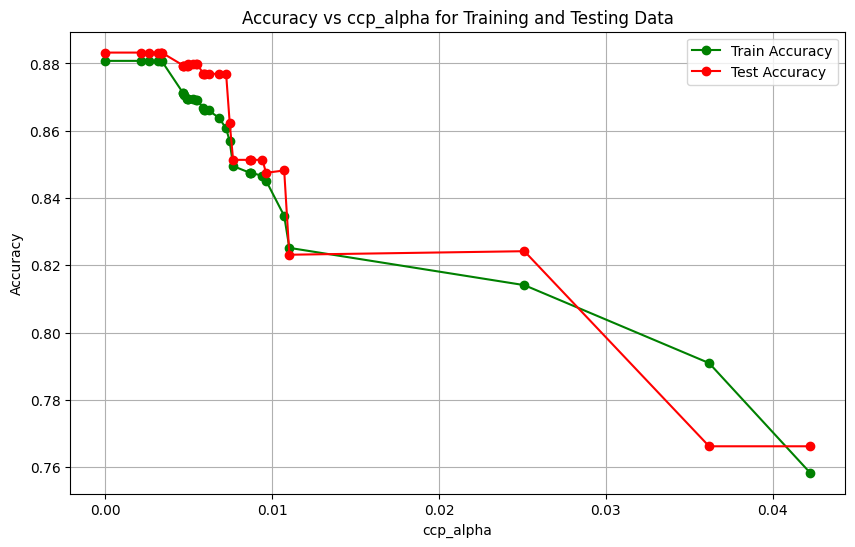

In [40]:
# Plotting the Accuracy versus the ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], train_accs, marker='o', label='Train Accuracy', color='green')  # Change color to green
plt.plot(ccp_alphas[:-1], test_accs, marker='o', label='Test Accuracy', color='red')  # Change color to red
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha for Training and Testing Data')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
print(nodes)
print(depths)

[47, 41, 41, 33, 33, 33, 33, 31, 31, 31, 31, 31, 29, 29, 29, 29, 27, 27, 27, 25, 25, 25, 19, 17, 17, 15, 15, 15, 13, 11, 9, 7, 5, 3]
[8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 1]


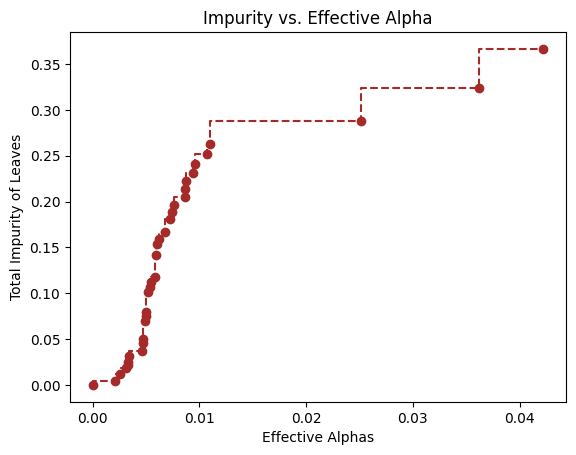

In [42]:
# Plots Impurity versus Alpha
plt.step(ccp_alphas[:-1], impurities[:-1], '--o', color='brown')
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Total Impurity of Leaves');

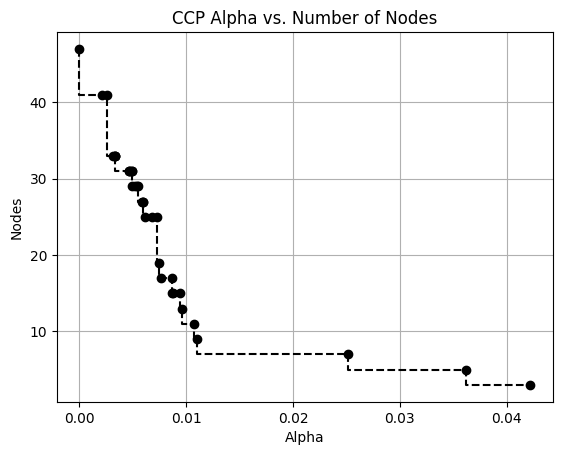

In [43]:
# Plots Alpha versus Nodes
plt.step(ccp_alphas[:-1], nodes, '--o', color='black')
plt.xlabel('Alpha')
plt.ylabel('Nodes')
plt.title('CCP Alpha vs. Number of Nodes')
plt.grid();

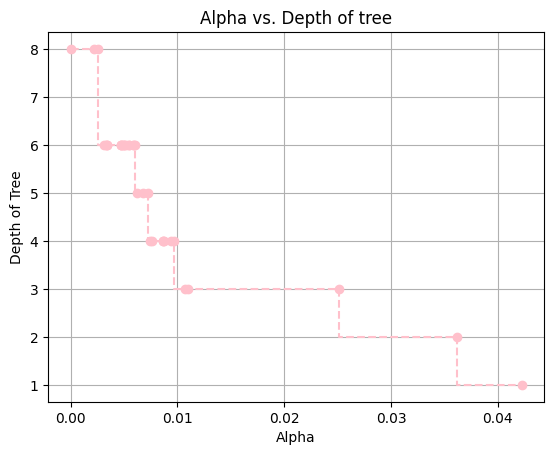

In [44]:

plt.step(ccp_alphas[:-1], depths, '--o', color='pink')
plt.ylabel('Depth of Tree')
plt.xlabel('Alpha')
plt.grid()
plt.title('Alpha vs. Depth of tree');

In [45]:
# This section takes the best train and test accuracies adn identifies the associated tree depth
# Find the index of the best test accuracy
best_index = test_accs.index(max(test_accs))

# Get optimal ccp_alpha
optimal_ccp_alpha = ccp_alphas[best_index]

# accuracy values
optimal_train_acc = train_accs[best_index]
optimal_test_acc = test_accs[best_index]
optimal_impurity = impurities[best_index]
optimal_depth = depths[best_index]
optimal_nodes = nodes[best_index]

# Print optimal settings
print(f"Optimal ccp_alpha: {optimal_ccp_alpha}")
print(f"Training Accuracy: {optimal_train_acc}")
print(f"Test Accuracy: {optimal_test_acc}")
print(f"Impurity: {optimal_impurity}")
print(f"Tree Depth: {optimal_depth}")
print(f"Node Count: {optimal_nodes}")


Optimal ccp_alpha: 0.0
Training Accuracy: 0.8807251595911737
Test Accuracy: 0.8831873905429072
Impurity: 0.0
Tree Depth: 8
Node Count: 47


**Observation:** The optimal tree has a Test Accuracy of .8831 and a Node Depth of 8

The tree diagram takes the best optimal values from my code above and uses them to print that tree out below.

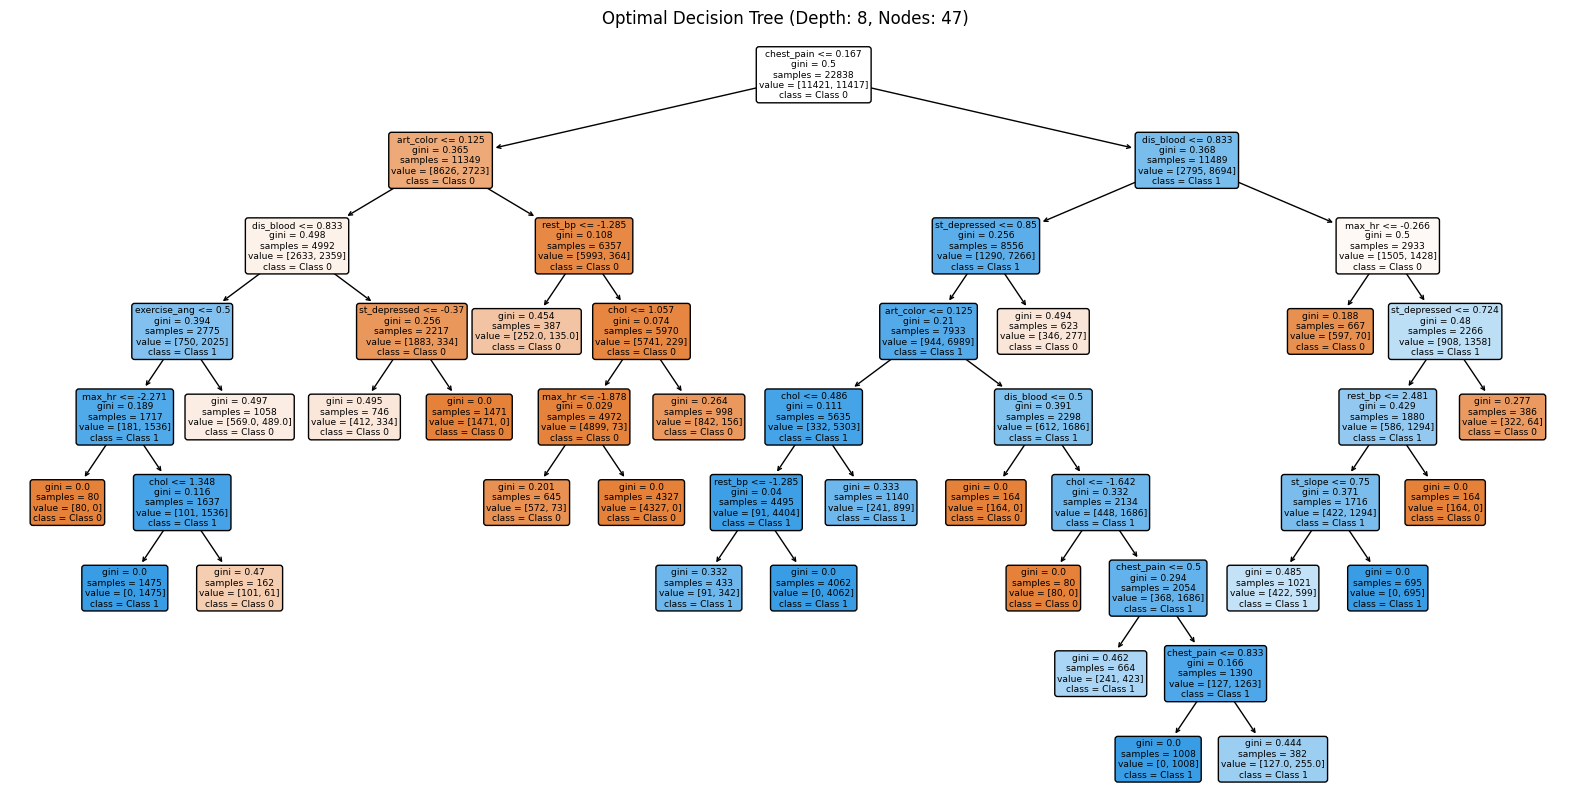

In [46]:
# Train the optimal decision tree - with the best parameters I found above
optimal_dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha, min_samples_split=0.05).fit(X_train, y_train)

# Plot optimal decision tree
plt.figure(figsize=(20, 10))
plot_tree(optimal_dtree, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title(f"Optimal Decision Tree (Depth: {optimal_depth}, Nodes: {optimal_nodes})")
plt.show()

**KNN Classifier, Support Vector Machine (SVM), Random Forest via GridSearchCV**

Note: All three of these models are added below along with hyperparameters I wanted to consider.  This is done by cross validation and a grid search.

In [47]:
# Function to evaluate and display metrics for a each model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)   
    metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, pos_label=1),
        'Recall': recall_score(y_test, y_test_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_test_pred, pos_label=1)
    }
    
    return metrics


# This is a grid search with cross validation for several hyperparameters for KNN, RandomForest, and SVC models
# The three models I selected for the binary classification objective
models2 = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC()
}

# hyperparameters to be tested with the three models
params2 = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}
}

scoring = make_scorer(precision_score, pos_label=1) 
results2 = []
best_models = {}

# grid for three models
for model_name, model in models2.items():
    # Grid search
    grid = GridSearchCV(model, params2[model_name], scoring=scoring, cv=5)
    start = time()
    grid.fit(X_train, y_train)
    end = time()
    
    # Store the best model for each type
    best_models[model_name] = grid.best_estimator_
    
    # Create a data frame for the results by model name, train score, test score, and execution time
    result2 = pd.DataFrame({
        'model': [model_name],
        'train score': [grid.score(X_train, y_train)],
        'test score': [grid.score(X_test, y_test)],
        'average fit time': [(end - start) / 5]  # average over 5-fold CV
    })
    results2.append(result2)

results_all = pd.concat(results2, ignore_index=True)
print(results_all)

for model_name, model in best_models.items():
    if model is not None:
        print(f"Metrics for the best {model_name} model:")
        metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")
        print("\n")


           model  train score  test score  average fit time
0            KNN     1.000000    0.999300          0.851621
1  Random Forest     1.000000    1.000000        127.928882
2            SVC     0.997031    0.994085        181.661581
Metrics for the best KNN model:
Accuracy: 0.9995
Precision: 0.9993
Recall: 0.9996
F1 Score: 0.9995


Metrics for the best Random Forest model:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Metrics for the best SVC model:
Accuracy: 0.9970
Precision: 0.9941
Recall: 1.0000
F1 Score: 0.9970




**Observation:** Based on evalutating the models based on four key metrics; Accuracy, Precision, Recall, and F1 Score, due the medical nature of the problem at hand I believe all models did well but the F1 Score is the focus.  Based on that the Random Forest did very well.

**Confusion Matrices**

Confusion Matrix for KNN:
[[2851    2]
 [   1 2856]]


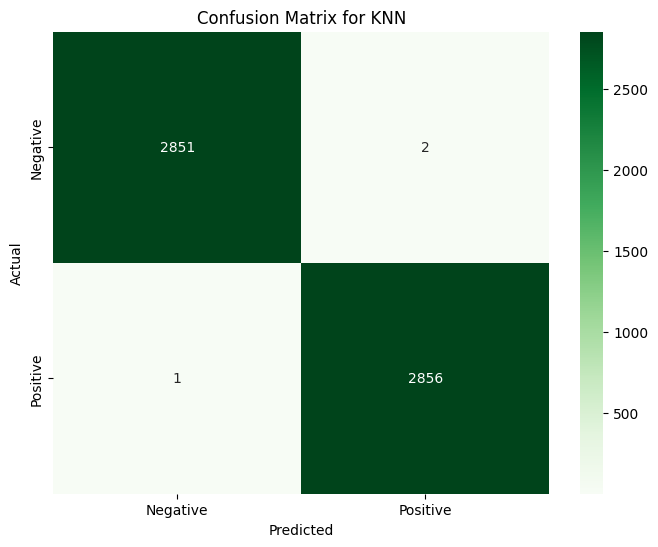

Confusion Matrix for Random Forest:
[[2853    0]
 [   0 2857]]


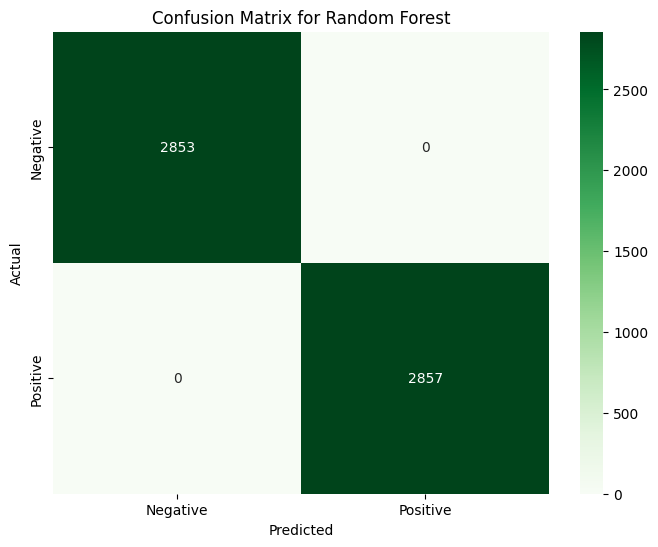

Confusion Matrix for SVC:
[[2836   17]
 [   0 2857]]


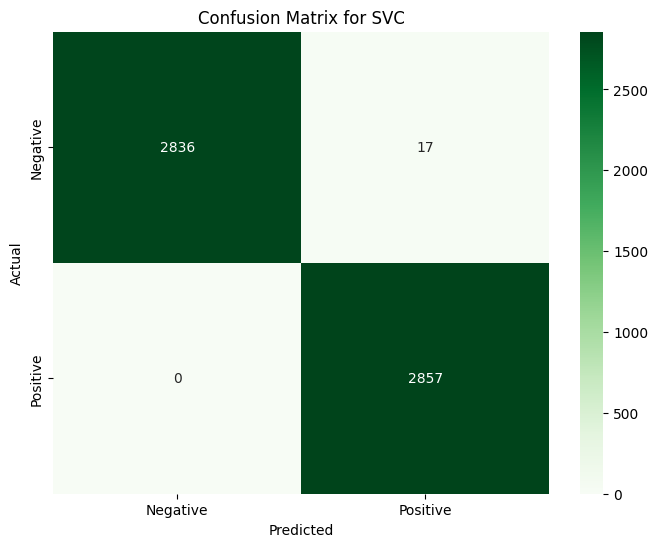

In [48]:
# Function confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Create confusion matrices for the best models
for model_name, model in best_models.items():
    if model is not None:
        y_test_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_test_pred)
        print(f"Confusion Matrix for {model_name}:")
        print(cm)
        plot_confusion_matrix(cm, model_name)

**Observation** Random Forest shows the best results

**Learning Curves**

Even though the data base previously balanced, cross-validated, and split into training and test sets. I am running learning curves to see if there is overfitting.

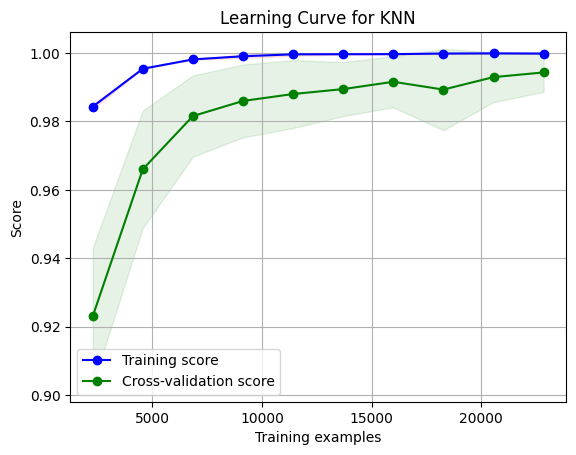

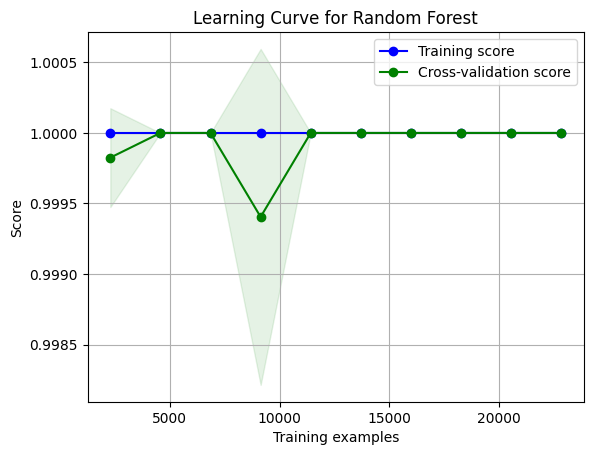

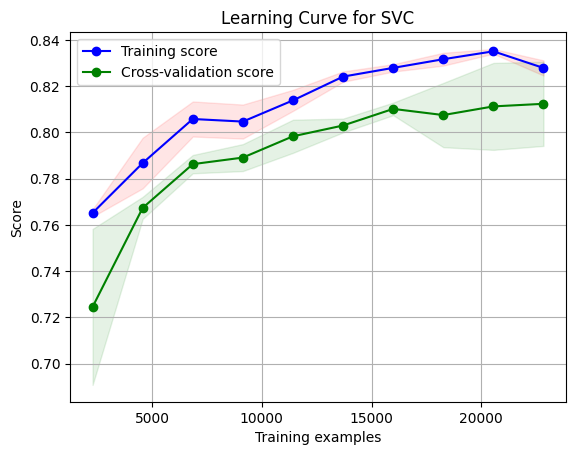

In [49]:
# defines learning curve function that can be used by best_models to extract values and plot the learning curves
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curves for the best models
for model_name, model in best_models.items():
    plot_learning_curve(model, X_resampled, y_resampled, model_name)

**Most Impacting Features**

In [50]:
# defines a function to obtain the top impacting features based on best_models
def get_top_features(model, X_train, X_test, y_test, top_n=3):
    if hasattr(model, 'coef_'):
        # For linear models like SVC with linear kernel
        importance = np.abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        # For tree-based models like RandomForest
        importance = model.feature_importances_
    else:
        # For models like KNN, use permutation feature importance
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        importance = result.importances_mean
        
    # Get the indices of the top_n features
    top_indices = np.argsort(importance)[-top_n:][::-1]
    top_features = X_train.columns[top_indices]
    top_importances = importance[top_indices]

    return top_features, top_importances

# Determine the top 3 impacting features for each best model
for model_name, model in best_models.items():
    if model is not None:
        top_features, top_importances = get_top_features(model, X_train, X_test, y_test)
        print(f"Top 3 impacting features for {model_name}:")
        for feature, importance in zip(top_features, top_importances):
            print(f"{feature}: {importance:.4f}")
        print("\n")

Top 3 impacting features for KNN:
st_depressed: 0.1773
max_hr: 0.1552
chol: 0.1389


Top 3 impacting features for Random Forest:
chest_pain: 0.1623
max_hr: 0.1324
art_color: 0.1313


Top 3 impacting features for SVC:
st_depressed: 0.1760
max_hr: 0.1275
rest_bp: 0.1230




**Observation:** max_hr, st_depressed seem to be the very top impacting features on model performance

These comments below are for the Final Capstone Project in Module 24 - To be completed later

In [ ]:
# Then based on the Cross Validation and Hyperparameters Grid Search Select Best Model HERE its own subsection, and Talk about details of results - meaning

In [ ]:
# Use the best model determine right above and do the Predictions with the data - show mini table of actual values vs predicted

In [ ]:
# Right any data set Interpretations of the results here

In [ ]:
# Maybe put a plot or two here showing the actual versus predicted - or maybe for classificaiton the descision boundary type diagram

In [ ]:
# Maybe a plot of actual versus predicted value with diagonal line left to right - if works for clasification my not work - Vivian office hr.

## Conclusion

 This section is to be completed for Module 24 later

In [ ]:
# Business Understanding Recap

In [ ]:
# Interesting Findings Matrix

In [ ]:
# Actionable Insights - Actions the Business can take in their language

## Deploy / Implementation - leverage pkl file

This section is to be completed for Module 24 later

In [ ]:
# Joblib library

In [ ]:
# PKL file

In [ ]:
# then in another jupyter notebook show how to use the pkl file or setup a website to use it - or do an interactive notebook where it prompts for data then does prediction